<a href="https://colab.research.google.com/github/SRINI-J/Object_detection/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics -q
!pip install pyyaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = YOLO("/content/yolov8l.pt")

In [ ]:
model.predict("/content/key_frame_2139.jpg" , save = True , save_txt = True)


image 1/1 /content/key_frame_2139.jpg: 416x640 1 car, 2 trucks, 1908.8ms
Speed: 4.2ms preprocess, 1908.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
file_name = "/content/coco.yaml"
with open(file_name , "r") as stream:
  names = yaml.safe_load(stream)["names"]

In [ ]:
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
list = open("/content/runs/detect/predict/labels/key_frame_2139.txt" , "r").readlines()

In [ ]:
list

['7 0.51443 0.407659 0.160395 0.344523\n',
 '7 0.21287 0.575945 0.180879 0.207406\n',
 '2 0.0799915 0.589367 0.104229 0.131103\n']

In [ ]:
for l in list:
  ind = int(l.split()[0])
  print(ind ,  names[ind])

7 truck
7 truck
2 car


In [ ]:
lis = list[0].split()
xc , yc , nw , nh = float(lis[1]) , float(lis[2]), float(lis[3]) , float(lis[4])

In [ ]:
image = cv2.imread("/content/runs/detect/predict/key_frame_2139.jpg")
h , w = image.shape[0], image.shape[1]

In [ ]:
xc *= w
yc *= h
nw *= w
nh *= h
top_left = (int(xc - nw/2), int(yc -nh/2))
bottom_right = (int(xc + nw/2) , int(yc + nh/2))


In [ ]:
top_left , bottom_right

((1250, 437), (1712, 1078))

In [ ]:
top_left

(1250, 437)

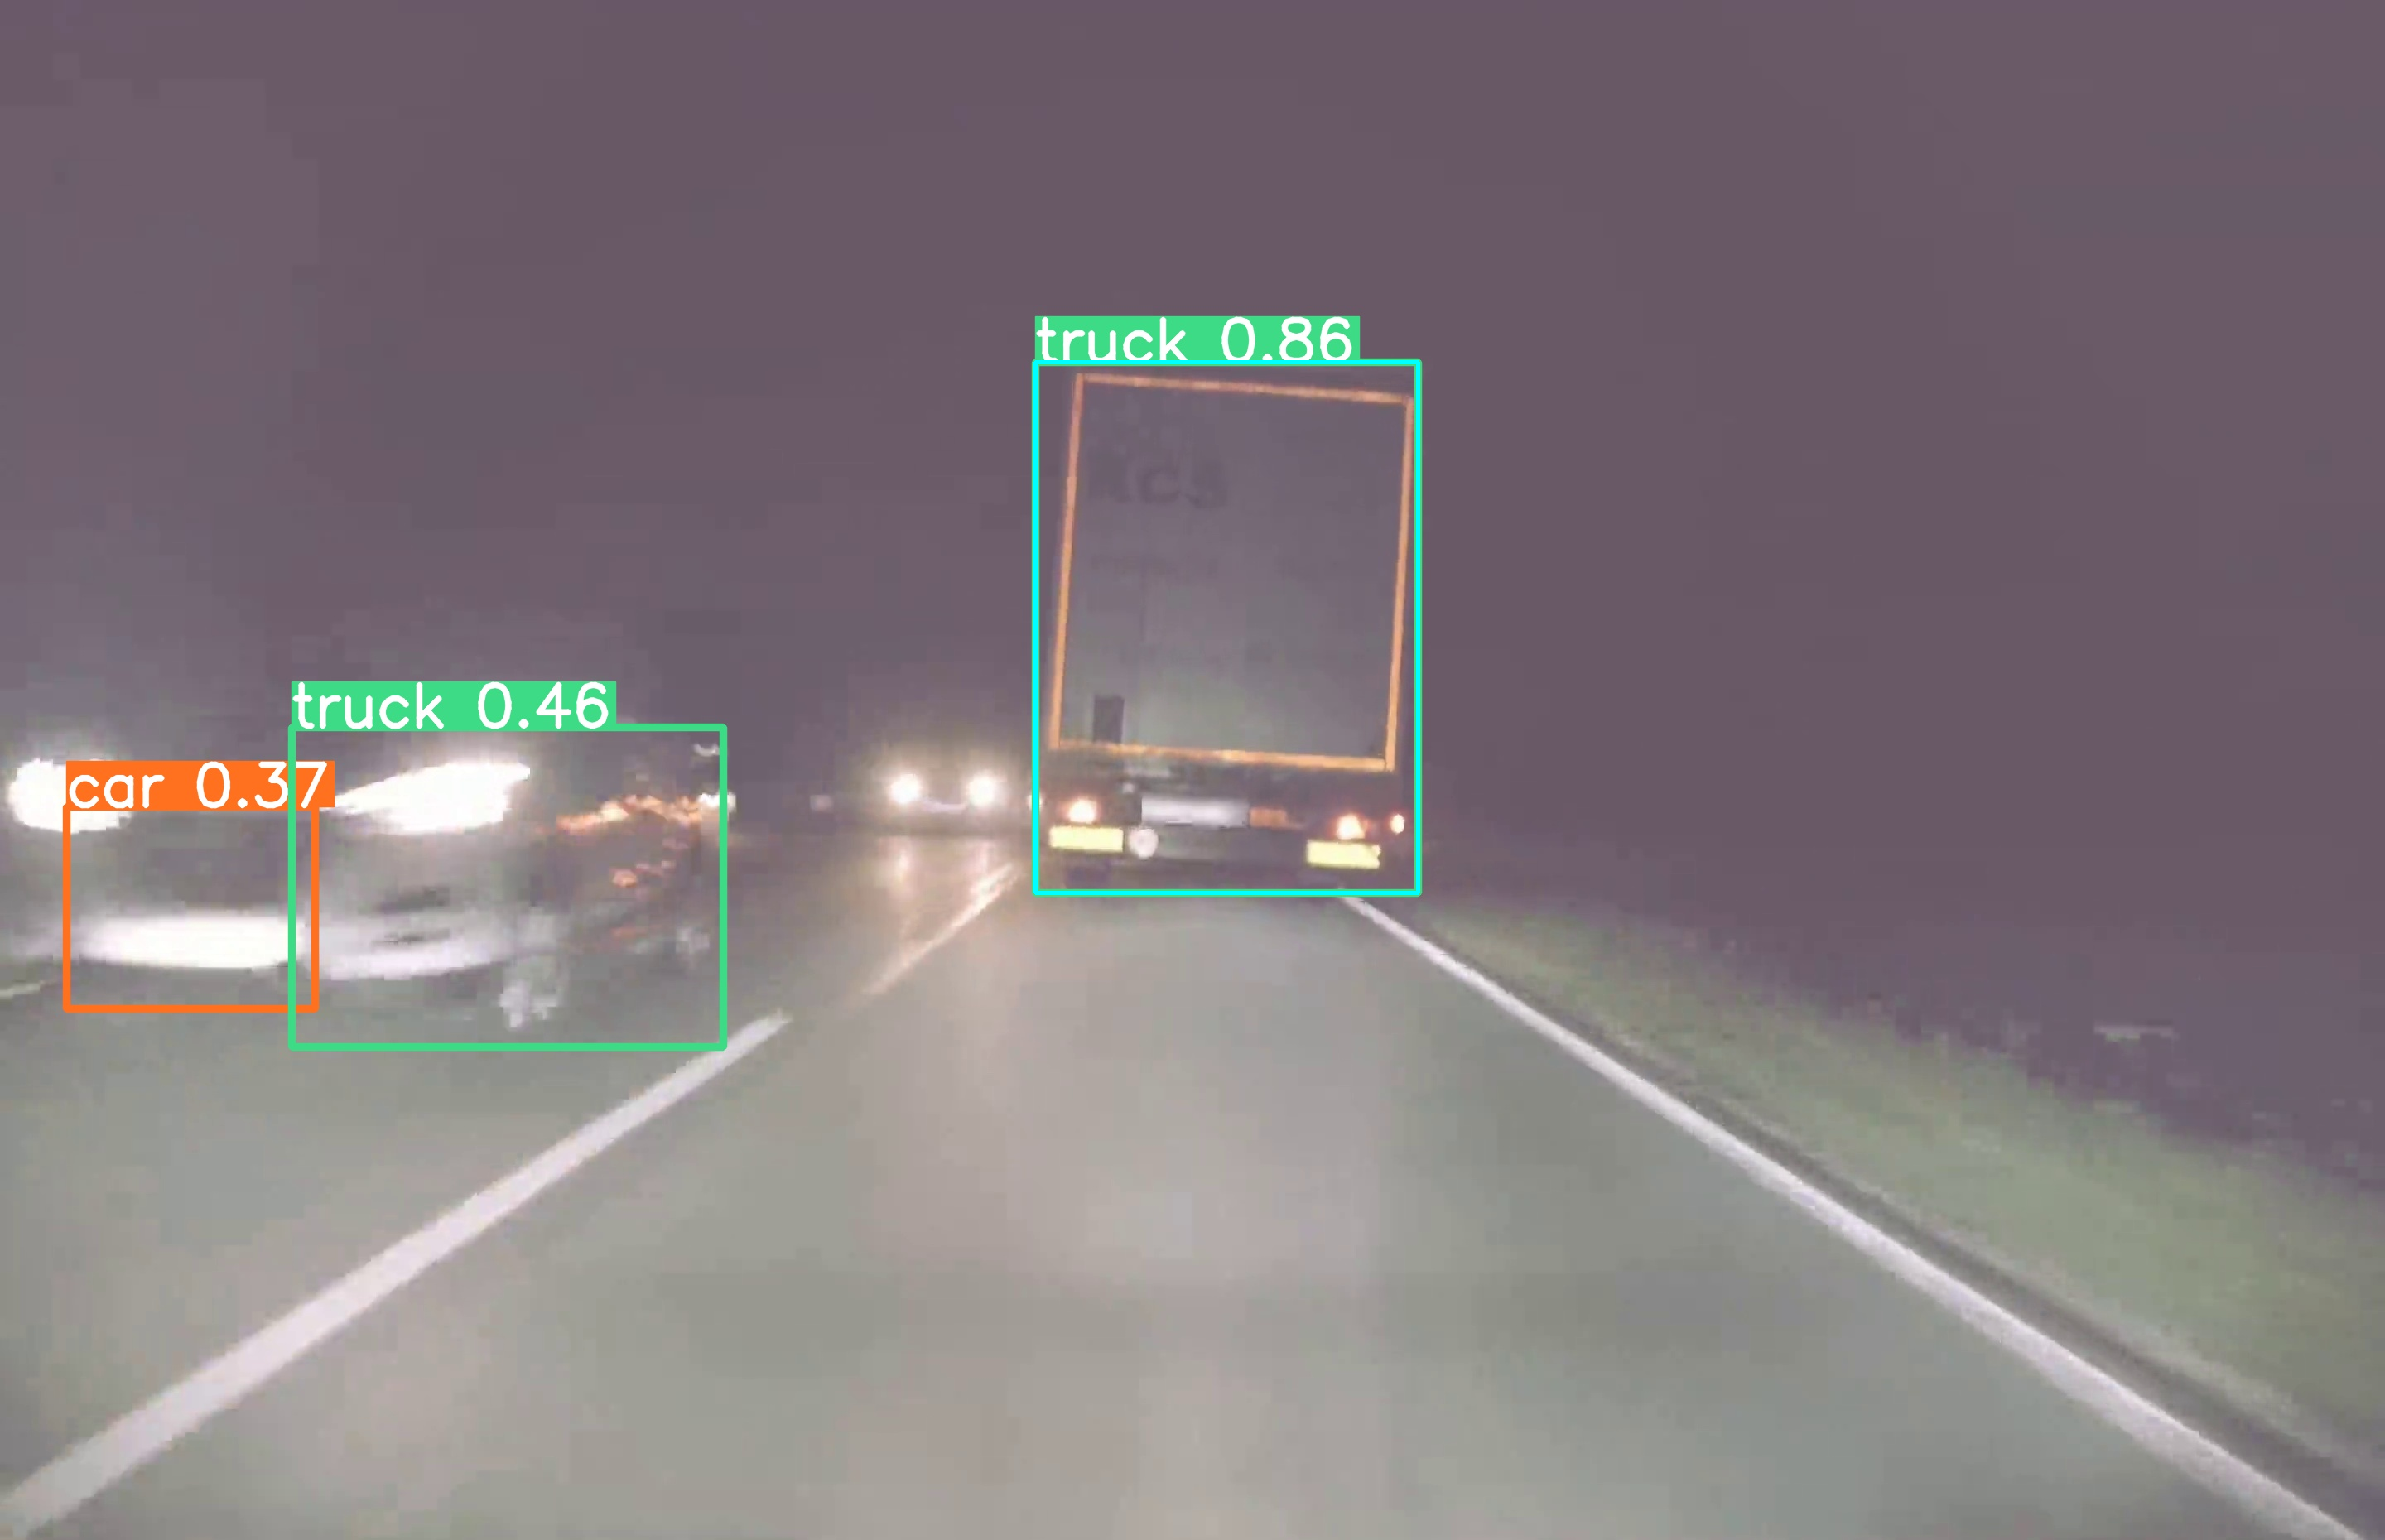

In [ ]:
img = cv2.rectangle (image, top_left , bottom_right , (255,255, 0) , 3)
cv2_imshow(img)

In [ ]:
pixel = [top_left, bottom_right]

In [ ]:
x1, y1  = 1250, 437
x2, y2 = 1712, 1078


In [ ]:
roi = img[y1:y2, x1:x2]

In [ ]:
mean = cv2.mean(roi)

In [ ]:
light = mean.index(max(mean))

In [ ]:
from skimage import measure
import numpy as np
import imutils

In [ ]:
original = roi.copy()

In [ ]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

In [ ]:
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)


In [ ]:
labels = measure.label(thresh, connectivity=2, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

In [ ]:
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue

    # otherwise, construct the label mask and count the
    # number of pixels
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 300:
        mask = cv2.add(mask, labelMask)

# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print('--------------1--------------')
# print(type(cnts))
# print(mask.shape)
# print(mask.size)
# print(type(mask))
# print(mask)
# print(len(cnts))
if not cnts:
    print('---------------1.1----------------------')
    print('no bright spots')
else:
    # cnts = contours.sort_contours(cnts)[0]
    print('--------------2--------------')

--------------1--------------
---------------1.1----------------------
no bright spots


In [ ]:
for (i, c) in enumerate(cnts):
    # Get the bounding rectangle around the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Draw a rectangle around the contour
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), -1)

    # Add text with contour index
    cv2.putText(original, "{}".format(i + 1), (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)


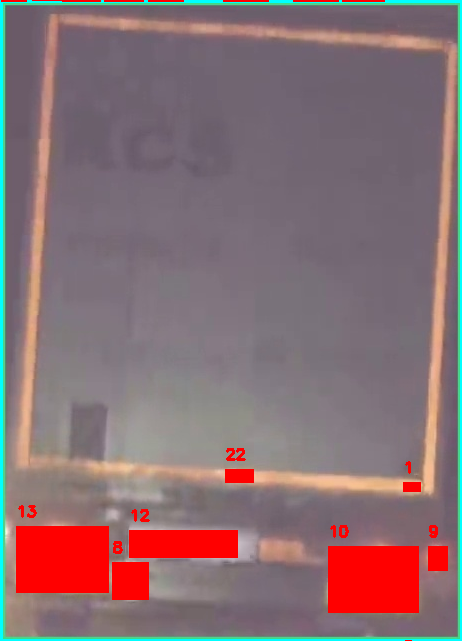

In [ ]:
cv2_imshow(original)

In [ ]:
roi_main = image[y1:y2, x1:x2].copy()
gray_roi = cv2.cvtColor(roi_main, cv2.COLOR_BGR2GRAY)
blurred_roi = cv2.GaussianBlur(gray_roi, (15,15), 0)

In [ ]:
_, threshold_roi = cv2.threshold(blurred_roi, 200, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for contour in contours:
  area = cv2.contourArea(contour)
  if area > 1000:
    x,y,w,h = cv2.boundingRect(contour)
    filled_headlight = roi.copy()
    filled_headlight[threshold_roi != 0] = (255, 0, 0)
    # image[y1 + y:y1 + y + h, x1 + x:x1 + x + w] = filled_headlight


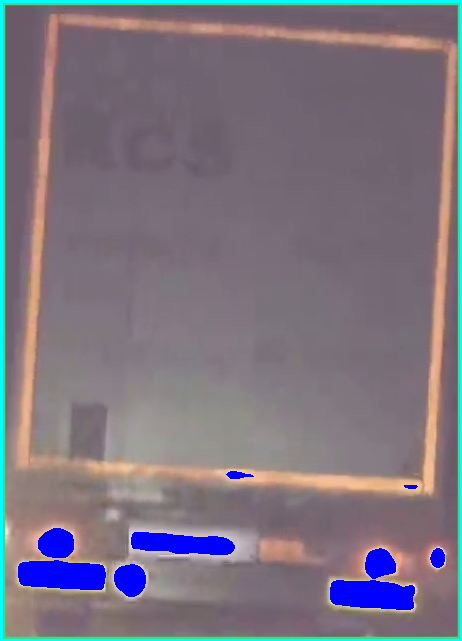

In [ ]:
cv2_imshow(filled_headlight)

In [ ]:
roi_hp = img[y1:y2, x1:x2]

In [ ]:
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

In [ ]:
lower_threshold = (0, 0, 0)
upper_threshold = (200, 255, 255)

In [ ]:
mask = cv2.inRange(roi_hsv, lower_threshold, upper_threshold)

In [ ]:
high_intensity_pixels = cv2.bitwise_and(roi, roi, mask=mask)

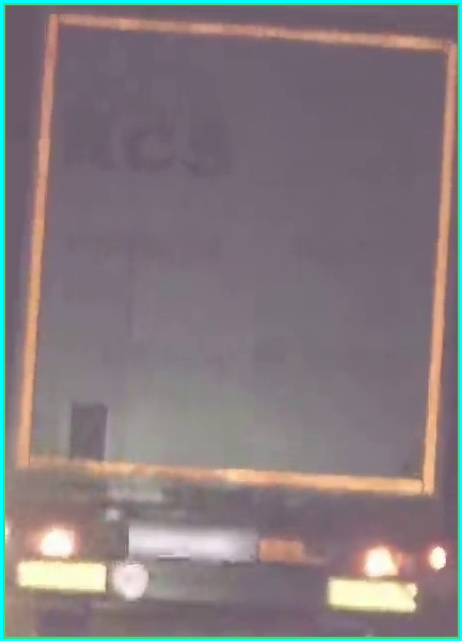

In [ ]:
cv2_imshow(high_intensity_pixels)

In [ ]:
gray = cv2.cvtColor(filled_headlight, cv2.COLOR_BGR2GRAY)

In [ ]:
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, detectShadows=True)

In [ ]:
fgmask = fgbg.apply(gray)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)


In [ ]:
contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:
      x, y, w, h = cv2.boundingRect(contour)
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

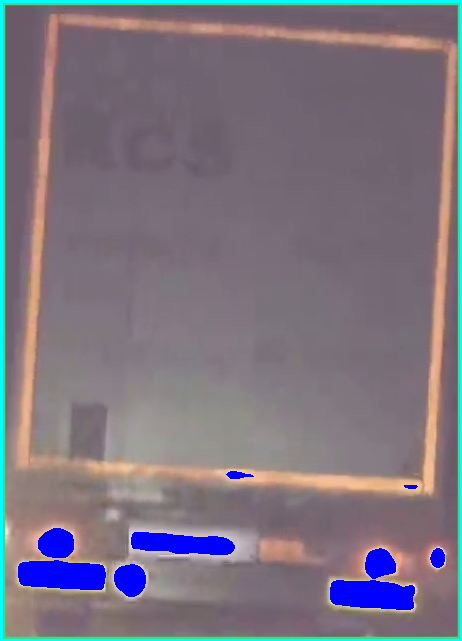

In [ ]:
cv2_imshow(filled_headlight)

In [ ]:
threshold = 225

In [ ]:
headlight = cv2.inRange(roi[:, :, light], threshold, 255)

In [ ]:
fill_roi = roi.copy()

In [ ]:
fill_roi[headlight !=0] = (0,255,0)

In [ ]:
fill_roi

array([[[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       [[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       [[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       ...,

       [[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [132, 221,  57],
        [255, 255,   0],
        [255, 255,   0]],

       [[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       [[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]]

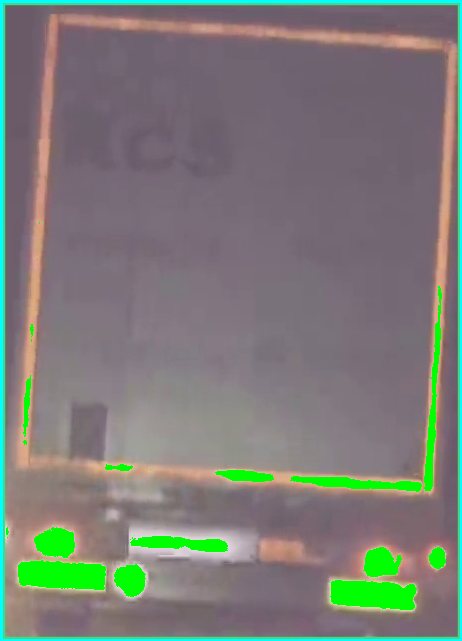

In [ ]:
cv2_imshow(fill_roi)